В целом этот код сгенерил GPT.
В нем реализован метод Рунге Кутты 4 порядка, используется разностная аппроксимация для производной по координате. 
В том числе из-за плохо подходящей для данной задачи разностной аппроксимации, в решениях наблюдаются сильные расхождения.

В программе также используются формулы для перехода к размерным величинам (в системе СИ) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gamma = 1.4 
rho0 = 1.225  # кг/м^3 (плотность воздуха на уровне моря)
p0   = 101325.0  # Па (атмосферное давление)
L0   = 1.0     # м (характерная длина)
U0   = np.sqrt(gamma * p0 / rho0) # м/с (характерная скорость, примерно скорость звука)
T0 = p0 / (rho0 * 287.0) # K (Характерная температура)
t_0   = L0 / U0    # Характерное время (с)
R = 287.0 # Газовая постоянная для воздуха (Дж/(кг*К))

def Conversion_in_Dim_quantities(x, rho, u, p, T, S, e):
    """Преобразование безразмерных величин в размерные """
    return x*L0, rho*rho0, u*U0, p*p0, T*T0, S * R, e * U0**2 # S: Дж/кг/К, e: Дж/кг

def Conversion_in_Dim_less_quantities(x, rho, u, p, T, S, e):
    """Преобразование размерных величин в безразмерные."""
    return x/L0, rho/rho0, u/U0, p/p0, T/T0, S / R, e / U0**2

def ConversionTime_in_Dim(t):
    """Преобразование безразмерного времени в размерное."""
    return t*t_0

def ConversionTime_in_Dim_less(t):
    """Преобразование размерного времени в безразмерное."""
    return t/t_0
print(rho0,p0,L0,U0,T0, t_0, sep='\n')

1.225
101325.0
1.0
340.29399054347107
288.20308611249374
0.002938635496921167


In [7]:
fig_size = (10, 8)  # Увеличим размер, чтобы уместить несколько графиков
line_color = 'black'
grid_linestyle = '--'
grid_alpha = 0.5
grid_color = 'gray'

def create_subplots(r, rho, u, p, T, S, e, message : str, time):  # Добавляем S, e
    """Создает подграфики для плотности, скорости, давления, температуры и энтропии."""
    fig, axes = plt.subplots(2, 3, figsize=fig_size)  # Теперь 2x3, чтобы добавить энтропию
    fig.suptitle(f"{message}: time = {time:.5f} sec", fontsize=16)

    # Density plot
    axes[0, 0].plot(r, rho, color=line_color)
    axes[0, 0].set_xlabel('r (м)', fontsize=10)
    axes[0, 0].set_ylabel('Плотность (кг/м^3)', fontsize=10)
    axes[0, 0].set_title('Плотность', fontsize=12)
    axes[0, 0].grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)

    y_ticks = np.append(np.arange(np.min(rho), np.max(rho)*1.1, np.abs(np.min(rho))), np.max(rho))
    axes[0, 2].set_yticks(y_ticks)
    
    # Velocity plot
    axes[0, 1].plot(r, u, color=line_color)
    axes[0, 1].set_xlabel('r (м)', fontsize=10)
    axes[0, 1].set_ylabel('Скорость (м/с)', fontsize=10)
    axes[0, 1].set_title('Скорость', fontsize=12)
    axes[0, 1].grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)

    # Pressure plot
    axes[0, 2].plot(r, p, color=line_color)
    axes[0, 2].set_xlabel('r (м)', fontsize=10)
    axes[0, 2].set_ylabel('Давление (Па)', fontsize=10)
    axes[0, 2].set_title('Давление', fontsize=12)
    axes[0, 2].grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)
    
    #y_ticks = np.linspace(0, np.max(p), int(np.abs(np.max(p)/np.min(p))))  # 5 значений от 0 до max(p)
    y_ticks = np.append(np.arange(np.min(p), np.max(p)*1.1, np.abs(np.min(p))), np.max(p))
    axes[0, 2].set_yticks(y_ticks)
    
    # Temperature plot
    axes[1, 0].plot(r, T, color=line_color)
    axes[1, 0].set_xlabel('r (м)', fontsize=10)
    axes[1, 0].set_ylabel('Температура (K)', fontsize=10)
    axes[1, 0].set_title('Температура', fontsize=12)
    axes[1, 0].grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)

    #y_ticks = np.linspace(0, np.max(T), 5)  # 7 значений от 0 до max(p)
    print('T:',np.max(T))
    y_ticks = np.append(np.arange(np.min(T), np.max(T)*1.1, np.abs(np.min(T))), np.max(T))
    axes[1, 0].set_yticks(y_ticks)
    
    # Entropy plot
    axes[1, 1].plot(r, S, color=line_color)  # Добавляем график энтропии
    axes[1, 1].set_xlabel('r (м)', fontsize=10)
    axes[1, 1].set_ylabel('Энтропия (Дж/кг/К)', fontsize=10)
    axes[1, 1].set_title('Энтропия', fontsize=12)
    axes[1, 1].grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)

    # Internal energy plot
    axes[1, 2].plot(r, e, color=line_color)
    axes[1, 2].set_xlabel('r (м)', fontsize=10)
    axes[1, 2].set_ylabel('Внутренняя энергия (Дж/кг)', fontsize=10)
    axes[1, 2].set_title('Внутренняя энергия', fontsize=12)
    axes[1, 2].grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)

    #y_ticks = np.linspace(0, np.max(e), 5)  # 7 значений от 0 до max(p)
    y_ticks = np.append(np.arange(np.min(e), np.max(e)*1.1, np.abs(np.min(e))), np.max(e) )
    axes[1, 2].set_yticks(y_ticks)
    
    # ---------------------
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    plt.close(fig)
    
def Visualization(r, rho, u, p, T, S, e, message : str, time):
    print(message+":")
    create_subplots(r, rho, u, p, T, S, e, message, time)

0.2 0.01
Start:
T: 0.003484320557491289


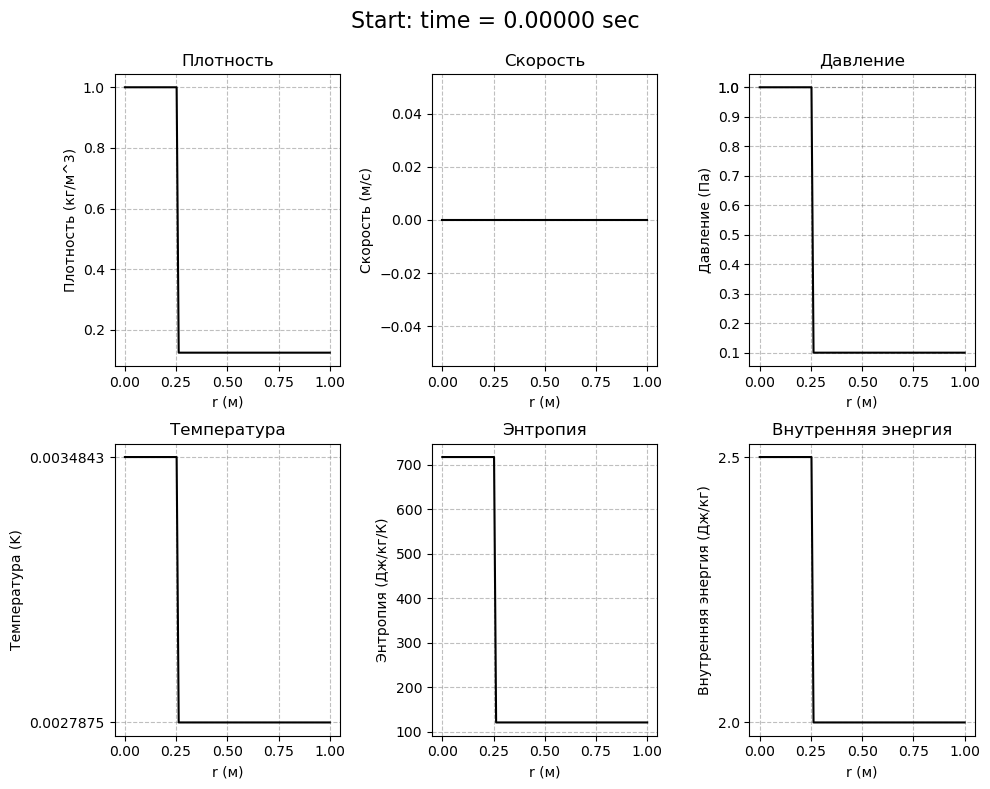

0.2 0.01
p: 0.1  rho: 0.125 |  1.1832159566199232 | 0.0008536911663924412
0.01 0.0008536911663924412
Time: 0.0008536912
p: 0.1  rho: 0.125 |  1.2210807298343784 | 0.0008272188606547052
0.0008536911663924412 0.0008272188606547052
Time: 0.0016809100
p: 0.1  rho: 0.125 |  1.25734590384312 | 0.0008033596856788594
0.0008272188606547052 0.0008033596856788594
Time: 0.0024842697
p: 0.1  rho: 0.125 |  1.2920408484865913 | 0.0007817872099664449
0.0008033596856788594 0.0007817872099664449
Time: 0.0032660569
p: 0.1  rho: 0.125 |  1.3251983331917703 | 0.000762226290813511
0.0007817872099664449 0.000762226290813511
Time: 0.0040282832
p: 0.1  rho: 0.125 |  1.3568523624467528 | 0.000744444302163825
0.000762226290813511 0.000744444302163825
Time: 0.0047727275
p: 0.1  rho: 0.125 |  1.3870367529740888 | 0.0007282438680410944
0.000744444302163825 0.0007282438680410944
Time: 0.0055009714
p: 0.1  rho: 0.125 |  1.4157842074916838 | 0.0007134568988381258
0.0007282438680410944 0.0007134568988381258
Time: 0.006

C:\Users\izavo\AppData\Local\Temp\ipykernel_15440\2303254173.py:6: RuntimeWarning: invalid value encountered in log
  S = e/T + R*np.log(rho) # Удельная энтропия (Дж/(кг*К))


T: 2.5724785939359594e+53


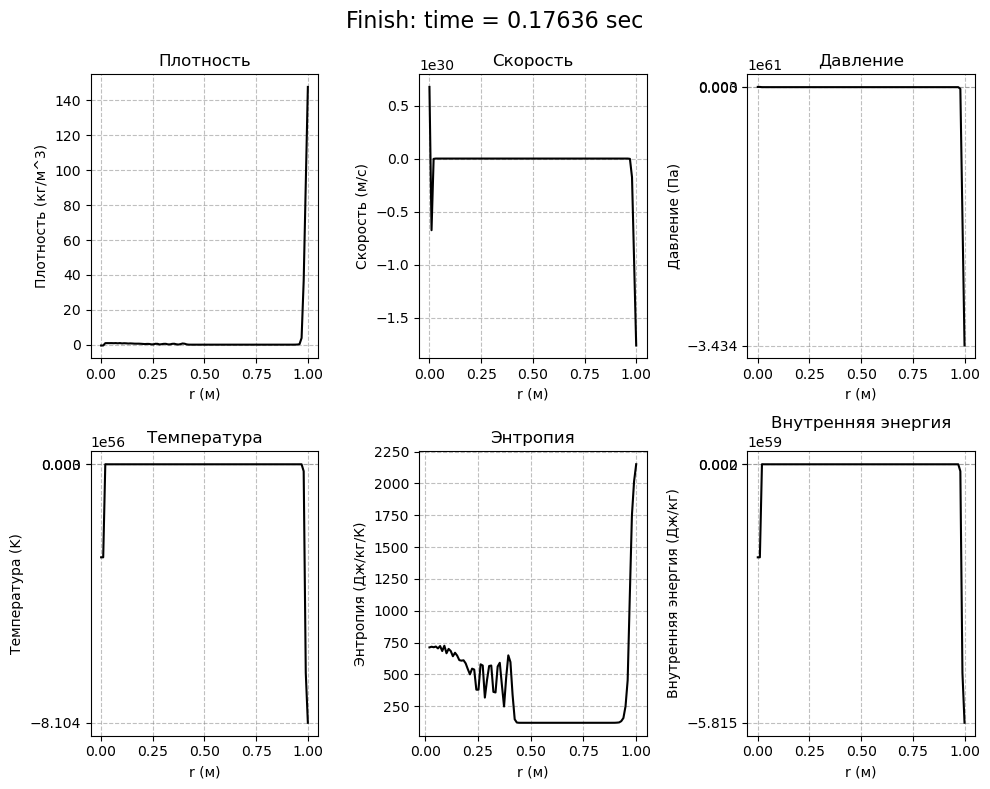

Finish:
T: 2.5724785939359594e+53


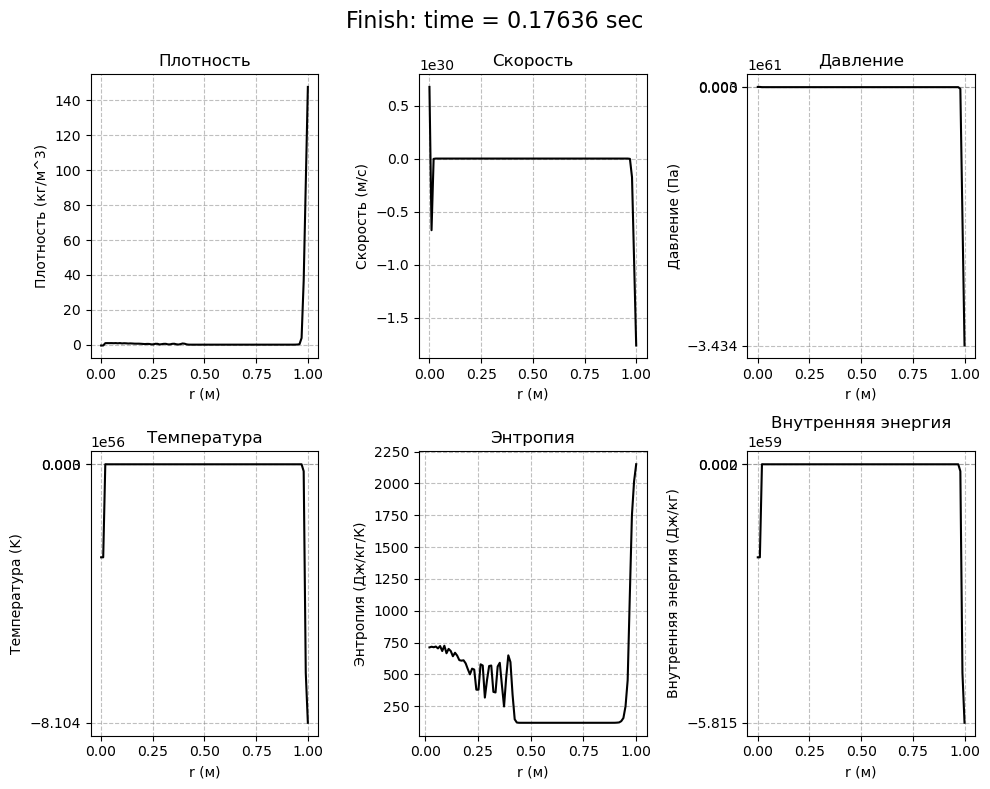

In [ ]:
def calculate_temperature_and_entropy(rho, p, gamma):
    """Вычисляет температуру, удельную энтропию и удельную внутреннюю энергию."""
    R = 287.0  # Газовая постоянная для воздуха (Дж/(кг*К))
    e = p / ((gamma - 1) * rho)  # Удельная внутренняя энергия
    T = p / (rho * R)  # Уравнение состояния для идеального газа
    S = e/T + R*np.log(rho) # Удельная энтропия (Дж/(кг*К))
    return T, S, e

def Initial_Conditional(r : list, n_points : int):
    """Установка начальных параметров."""

    r_bound = r[int(n_points / 4)]
    rho = np.ones(n_points)
    u = np.zeros(n_points)
    p = np.ones(n_points)
    p[r > r_bound] = 0.1
    rho[r > r_bound] = 0.125
    
    T = np.ones(n_points)
    S = np.ones(n_points)
    e = np.ones(n_points)
    
    T, S, e = calculate_temperature_and_entropy(rho, p, gamma)
    
    return rho, u, p, T, S, e

def calculate_fluxes(rho, u, p, gamma):
    F_rho  = rho * u
    F_rhou = rho * u**2 + p
    F_rhoE = (0.5*rho*u**2 + p/(gamma - 1))*u
    return F_rho, F_rhou, F_rhoE

# --------------------- Функция обновления переменных (RK4) ---------------------
def rk4_step(rho, u, p, dx, dt, gamma):
    E = p / (gamma - 1) + 0.5 * rho * u**2
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho, u, p, gamma)

    # k1
    drho_dt1  = - (np.roll(F_rho, -1) - np.roll(F_rho, 1)) / (2 * dx)
    drhou_dt1 = - (np.roll(F_rhou, -1) - np.roll(F_rhou, 1)) / (2 * dx)
    dE_dt1    = - (np.roll(F_rhoE, -1) - np.roll(F_rhoE, 1)) / (2 * dx)
    k1_rho  = dt * drho_dt1
    k1_rhou = dt * drhou_dt1
    k1_E    = dt * dE_dt1
    
    # k2
    rho_temp = rho + k1_rho / 2
    u_temp   = u + k1_rhou / (2*rho) / 2
    E_temp = E + k1_E / 2
    p_temp = (gamma - 1)*(E_temp - 0.5*rho_temp*u_temp**2)
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho_temp, u_temp, p_temp, gamma)
    drho_dt2  = - (np.roll(F_rho, -1) - np.roll(F_rho, 1)) / (2 * dx)
    drhou_dt2 = - (np.roll(F_rhou, -1) - np.roll(F_rhou, 1)) / (2 * dx)
    dE_dt2    = - (np.roll(F_rhoE, -1) - np.roll(F_rhoE, 1)) / (2 * dx)
    k2_rho  = dt * drho_dt2
    k2_rhou = dt * drhou_dt2
    k2_E    = dt * dE_dt2
        
    # k3
    rho_temp = rho + k2_rho / 2
    u_temp   = u + k2_rhou / (2*rho) / 2
    E_temp = E + k2_E / 2
    p_temp = (gamma - 1)*(E_temp - 0.5*rho_temp*u_temp**2)
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho_temp, u_temp, p_temp, gamma)
    drho_dt3  = - (np.roll(F_rho, -1) - np.roll(F_rho, 1)) / (2 * dx)
    drhou_dt3 = - (np.roll(F_rhou, -1) - np.roll(F_rhou, 1)) / (2 * dx)
    dE_dt3    = - (np.roll(F_rhoE, -1) - np.roll(F_rhoE, 1)) / (2 * dx)
    k3_rho  = dt * drho_dt3
    k3_rhou = dt * drhou_dt3
    k3_E    = dt * dE_dt3
        
    # k4
    rho_temp = rho + k3_rho
    u_temp   = u + k3_rhou / (2*rho)
    E_temp = E + k3_E
    p_temp = (gamma - 1)*(E_temp - 0.5*rho_temp*u_temp**2)
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho_temp, u_temp, p_temp, gamma)
    drho_dt4  = - (np.roll(F_rho, -1) - np.roll(F_rho, 1)) / (2 * dx)
    drhou_dt4 = - (np.roll(F_rhou, -1) - np.roll(F_rhou, 1)) / (2 * dx)
    dE_dt4    = - (np.roll(F_rhoE, -1) - np.roll(F_rhoE, 1)) / (2 * dx)
    k4_rho  = dt * drho_dt4
    k4_rhou = dt * drhou_dt4
    k4_E    = dt * dE_dt4

    # Обновление переменных
    rho = rho + (k1_rho + 2*k2_rho + 2*k3_rho + k4_rho) / 6
    u   = u   + (k1_rhou + 2*k2_rhou + 2*k3_rhou + k4_rhou) / 6
    E   = E   + (k1_E + 2*k2_E + 2*k3_E + k4_E) / 6
    p = (gamma - 1)*(E - 0.5*rho*u**2)
    
     
    rho[0] = rho[1]
    u[0] = -u[1]  # Отражаем скорость (симметрия)
    p[0] = p[1]

    rho[-1] = rho[-2] + (rho[-2] - rho[-3])
    u[-1] = u[-2] + (u[-2] - u[-3])
    p[-1] = p[-2] + (p[-2] - p[-3])
    
    T, S, e = calculate_temperature_and_entropy(rho, p, gamma)
    return rho, u, p, T, S, e

# ----------- Инициализация сетки -----------------
# ---------- (сферическая геометрия) --------------

n_points = 100 # Количество точек
x_min = 0.0    # Мин радиус (м)
x_max = 1.0    # Макс радиус (м)
x = np.linspace(x_min, x_max, n_points)  # Радиальная координата
dx = x[1] - x[0]  # Шаг по радиусу

# -----------  Инициализация переменных -----------

gamma = 1.4 # Показатель адиабаты
rho, u, p, T, S, e = Initial_Conditional(x, n_points) 

# -------------------------------------------------

#r, rho, u, p, T, S, e = Conversion_in_Dim_less_quantities(r, rho, u, p, T, S, e)
#print(max(p))

# ----------- Временные параметры -----------

t_end = 0.2      # Конечное время в секундах 
#t_end = ConversionTime_in_Dim_less(t_end) # Перевод в безразмерное время
dt = 1e-2
# В дальнейшем в цикле dt вычисляется на основе безразмерного cfl
cfl = 0.1          # Число Куранта

# t_end, dt = ConversionTime_in_Dim_less(np.array([t_end_dim, dt_dim]))
#t_end, dt = t_end_dim, dt_dim
print(t_end, dt)

t = 0.0
Visualization(x, rho, u, p, T, S, e, 'Start', t)

#  ----------- Основной цикл времени -----------
# --------------------- Временная петля ---------------------

print(t_end, dt)
while t < t_end:
    # Ограничение шага по времени
    a = np.sqrt(gamma * np.abs(p / rho))  #скорость звука
    
    print('p:', np.min(p), ' rho:', np.min(rho), '| ', np.max(np.abs(u) + a), '|', cfl * dx / np.max(np.abs(u) + a))
    print(dt, cfl * dx / np.max(np.abs(u) + a))
    dt = min(dt, cfl * dx / np.max(np.abs(u) + a)) # Шаг по времени связываем со скоростью звука
    
    if np.min(rho) < 0:
        Visualization(x, rho, u, p, T, S, e, 'Finish', t)
        break
    rho, u, p, T, S, e = rk4_step(rho, u, p, dx, dt, gamma)
    t += dt
    
    print(f"Time: {t:.10f}")

# ------------ Переход к размерным величинам ----------

#x, rho, u, p, T, S, e = Conversion_in_Dim_quantities(x, rho, u, p, T, S, e)

# ------------ Построение графиков --------------

Visualization(x, rho, u, p, T, S, e, 'Finish', t)

2.6 0.01
Start:
T: 0.003484320557491289


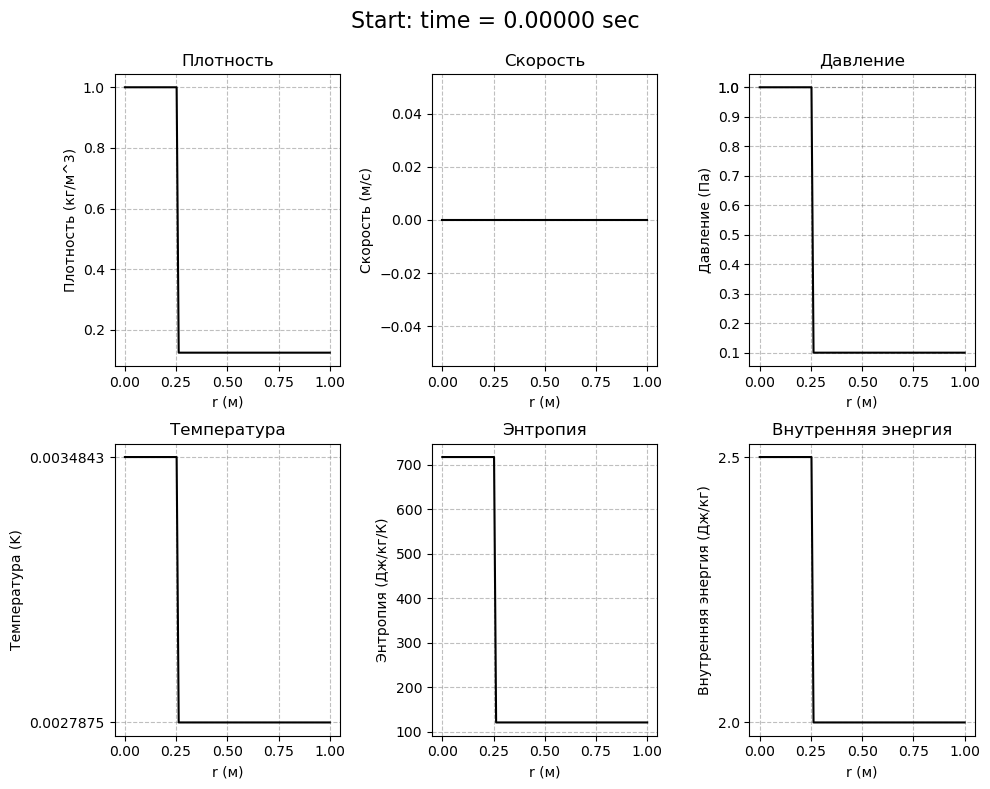

2.6 0.01
Time: 0.0068295293, dt = 6.8295e-03
Time: nan, dt = nan
Finish:


C:\Users\izavo\AppData\Local\Temp\ipykernel_15440\4065346567.py:66: RuntimeWarning: invalid value encountered in scalar divide
  H_r = (gamma * p_r) / ((gamma - 1) * rho_r) + 0.5 * u_r**2


ValueError: arange: cannot compute length

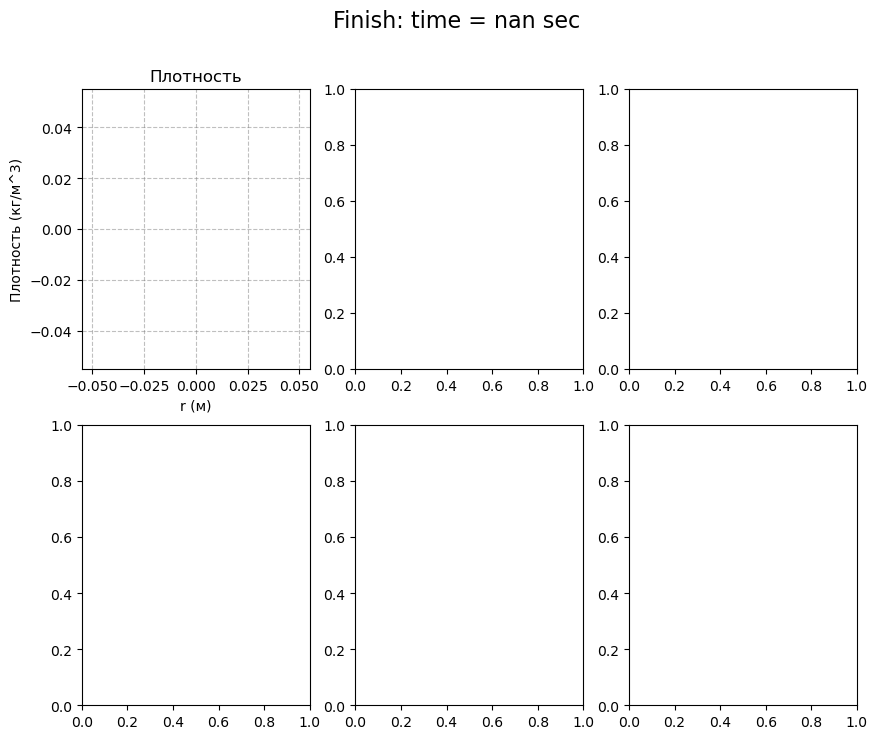

In [61]:
def calculate_temperature_and_entropy(rho, p, gamma):
    """Вычисляет температуру, удельную энтропию и удельную внутреннюю энергию."""
    R = 287.0  # Газовая постоянная для воздуха (Дж/(кг*К))
    e = p / ((gamma - 1) * rho)  # Удельная внутренняя энергия
    T = p / (rho * R)  # Уравнение состояния для идеального газа
    S = e/T + R*np.log(rho) # Удельная энтропия (Дж/(кг*К))
    return T, S, e

def Initial_Conditional(r : list, n_points : int):
    """Установка начальных параметров."""

    r_bound = r[int(n_points / 4)]
    rho = np.ones(n_points)
    u = np.zeros(n_points)
    p = np.ones(n_points)
    p[r > r_bound] = 0.1
    rho[r > r_bound] = 0.125
    
    T = np.ones(n_points)
    S = np.ones(n_points)
    e = np.ones(n_points)
    
    T, S, e = calculate_temperature_and_entropy(rho, p, gamma)
    
    return rho, u, p, T, S, e

def godunov_step(rho, u, p, dx, dt, gamma, riemann_solver):
    """Выполняет один шаг по времени с использованием метода Годунова."""
    n = len(rho)
    F_rho = np.zeros(n)
    F_rhou = np.zeros(n)
    F_rhoE = np.zeros(n)
    rho_new = np.zeros(n)
    u_new = np.zeros(n)
    p_new = np.zeros(n)
    E_new = np.zeros(n)
    E = p/(gamma - 1) + 0.5 * rho * u**2  # Общая энергия
    
    # Расчет потоков на границах ячеек
    for i in range(n - 1):
        # Решение задачи Римана на границе i+1/2
        # Используйте функцию riemann_solver для вычисления потоков
        F_rho[i+1], F_rhou[i+1], F_rhoE[i+1] = riemann_solver(rho[i], u[i], p[i],
                                                                rho[i+1], u[i+1], p[i+1],
                                                                gamma)
        rho_new[i] = (rho[i+1]+rho[i])/2 - dt / dx * (F_rho[i+1] - F_rho[i]) / 2 
        u_new[i] = (u[i+1]+u[i])/2 - dt / dx * (F_rhou[i+1]/rho[i+1] - F_rhou[i]/rho[i]) / 2
        
        E_new[i] = (E[i+1]+E[i])/2 - dt / dx * (F_rhoE[i+1]- F_rhoE[i]) / 2
    # Обновление переменных
    # rho_new = rho - dt / dx * (np.roll(F_rho, -1) - np.roll(F_rho, 1)) / 2 # central differencing
    # u_new = u - dt / dx * (np.roll(F_rhou, -1) - np.roll(F_rhou, 1)) / (2*rho) # Импульс
    # E = p[i]/(gamma - 1) + 0.5 * rho[i] * u[i]**2  # Общая энергия
    #E_new = E - dt / dx * (np.roll(F_rhoE, -1) - np.roll(F_rhoE, 1)) / 2

    p_new = (gamma - 1)*(E_new-0.5*rho_new*u_new**2)

    return rho_new, u_new, p_new

def roe_riemann_solver(rho_l, u_l, p_l, rho_r, u_r, p_r, gamma):
    """Roe-аппроксимация для решения задачи Римана (упрощенная)."""
    # Вычисление средних величин (Roe-averages)
    rho_avg = np.sqrt(rho_l * rho_r)
    u_avg = (np.sqrt(rho_l) * u_l + np.sqrt(rho_r) * u_r) / (np.sqrt(rho_l) + np.sqrt(rho_r))
    H_l = (gamma * p_l) / ((gamma - 1) * rho_l) + 0.5 * u_l**2
    H_r = (gamma * p_r) / ((gamma - 1) * rho_r) + 0.5 * u_r**2
    H_avg = (np.sqrt(rho_l) * H_l + np.sqrt(rho_r) * H_r) / (np.sqrt(rho_l) + np.sqrt(rho_r))
    c_avg = np.sqrt((gamma - 1) * (H_avg - 0.5 * u_avg**2))

    # Потоки
    F_rho = 0.5 * (rho_l * u_l + rho_r * u_r - c_avg * (rho_r - rho_l)) # Упрощенный поток
    F_rhou = 0.5 * (rho_l * u_l**2 + p_l + rho_r * u_r**2 + p_r - c_avg * (rho_r * u_r - rho_l * u_l))
    F_rhoE = 0.5 * ((rho_l * (rho_l*u_l**2/2+p_l/(gamma-1))) * u_l + (rho_r *(rho_r*u_r**2/2+p_r/(gamma-1))) * u_r - c_avg * (rho_r * (rho_r*u_r**2/2+p_r/(gamma-1)) - rho_l * (rho_l*u_l**2/2+p_l/(gamma-1))))

    return F_rho, F_rhou, F_rhoE

def rk4_step(rho, u, p, dx, dt, gamma, riemann_solver):
    """Выполняет один шаг по времени с использованием метода Рунге-Кутты 4-го порядка (RK4)
    с заменой calculate_fluxes на godunov_step."""

    # k1
    rho1, u1, p1 = godunov_step(rho, u, p, dx, dt, gamma, riemann_solver)
    # k2
    rho2, u2, p2 = godunov_step(rho1, u1, p1, dx, dt/2, gamma, riemann_solver)
    # k3
    rho3, u3, p3 = godunov_step(rho2, u2, p2, dx, dt/2, gamma, riemann_solver)
    #k4
    rho4, u4, p4 = godunov_step(rho, u, p, dx, dt, gamma, riemann_solver)

    #Обновление переменных
    rho_new = rho + (dt/6)*(rho1 + 2*rho2 + 2*rho3 + rho4)
    u_new = u + (dt/6)*(u1 + 2*u2 + 2*u3 + u4)
    p_new = p + (dt/6)*(p1 + 2*p2 + 2*p3 + p4)

    # Жесткая стенка (u = 0)
    u_new[0] = 0
    u_new[1] = 0 # Дополнительно устанавливаем скорость соседней ячейки

    # Симметричные условия (d(rho)/dx = 0, d(p)/dx = 0)
    rho_new[0] = rho_new[1] # Плотность в первой ячейке равна плотности во второй
    p_new[0] = p_new[1] # Давление в первой ячейке равно давлению во второй
    
    return rho_new, u_new, p_new


# ----------- Инициализация сетки -----------------
# ---------- (сферическая геометрия) --------------

n_points = 100 # Количество точек
x_min = 0.0    # Мин радиус (м)
x_max = 1.0    # Макс радиус (м)
x = np.linspace(x_min, x_max, n_points)  # Радиальная координата
dx = x[1] - x[0]  # Шаг по радиусу

# -----------  Инициализация переменных -----------

gamma = 1.4 # Показатель адиабаты
rho, u, p, T, S, e = Initial_Conditional(x, n_points) 

# -------------------------------------------------

#r, rho, u, p, T, S, e = Conversion_in_Dim_less_quantities(r, rho, u, p, T, S, e)
#print(max(p))

# ----------- Временные параметры -----------

t_end = 2.6     # Конечное время в секундах 
#t_end = ConversionTime_in_Dim_less(t_end) # Перевод в безразмерное время
dt = 1e-2
# В дальнейшем в цикле dt вычисляется на основе безразмерного cfl
cfl = 0.8          # Число Куранта

# t_end, dt = ConversionTime_in_Dim_less(np.array([t_end_dim, dt_dim]))
#t_end, dt = t_end_dim, dt_dim
print(t_end, dt)

t = 0.0
Visualization(x, rho, u, p, T, S, e, 'Start', t)

#  ----------- Основной цикл времени -----------
# --------------------- Временная петля ---------------------

print(t_end, dt)
# Основной цикл
while t < t_end:
    # 1. Ограничение шага по времени (CFL-условие)
    a = np.sqrt(gamma * np.abs(p / rho))  # Скорость звука

    # Вычисляем шаг по времени на основе CFL
    dt = cfl * dx / np.max(np.abs(u) + a)  # Шаг по времени связываем со скоростью звука

    # Предотвращаем отрицательную плотность (проверка устойчивости)
    if np.min(rho) < 0:
        print("Отрицательная плотность обнаружена. Завершение.")
        Visualization(x, rho, u, p, T, S, e, 'Finish', t)
        break

    # 2. Шаг по времени с использованием RK4 и Godunov
    rho, u, p = rk4_step(rho, u, p, dx, dt, gamma, roe_riemann_solver)

    T, S, e = calculate_temperature_and_entropy(rho, p, gamma)
    # 3. Обновление времени
    t += dt

    # 4. Вывод информации (для контроля)
    print(f"Time: {t:.10f}, dt = {dt:.4e}")


# ------------ Переход к размерным величинам ----------

#x, rho, u, p, T, S, e = Conversion_in_Dim_quantities(x, rho, u, p, T, S, e)

# ------------ Построение графиков --------------

Visualization(x, rho, u, p, T, S, e, 'Finish', t)

In [18]:
#fig_size = (6, 4) 
#line_color = 'black'
#grid_linestyle = '--'
#grid_alpha = 0.5
#grid_color = 'gray'
    
def create_plot1(x_data, y_data, x_label, y_label, title):
    plt.figure(figsize=fig_size) 
    plt.plot(x_data, y_data, color=line_color)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)
    # plt.ylim(0,2) # Пример: установить предел по оси Y от 0 до 2
    plt.show()
    plt.close()

def Visualization1(r, rho, u, p, T, message):
    # Общие настройки для графиков
    
    print(message)
    
    #Графики
    # Density plot
    create_plot(r, rho, 'r (м)', 'Плотность (кг/м^3)', 'Плотность')
    #del x, rho

    # Velocity plot
    create_plot(r, u, 'r (м)', 'Скорость (м/с)', 'Скорость')
    #del x, u

    # Pressure plot
    #x = np.linspace(xmin, xmax, nx)
    create_plot(r, p, 'x (м)', 'Давление (Па)', 'Давление')
    #del x, p
    # Temperature plot
    #x = np.linspace(xmin, xmax, nx)
    create_plot(r, T, 'x (м)', 'Температура (К)', 'Температура')
    #del x, T

### Cферически симметричный случай

In [3]:
gamma = 1.4 
rho0 = 1.225  # кг/м^3 (плотность воздуха на уровне моря)
p0   = 101325.0  # Па (атмосферное давление)
L0   = 1.0     # м (характерная длина)
U0   = np.sqrt(gamma*p0 / rho0) # м/с (характерная скорость, примерно скорость звука)
T0 = p0/(rho0*287) # K (Характерная температура)
t_0   = L0 / U0    # Характерное время (с)

def Conversion_in_Dim_quantities(x, rho, u, p, T):
    return x*L0, rho*rho0, u*U0, p*p0, T*T0

def Conversion_in_Dim_less_quantities(x, rho, u, p, T):
    return x/L0, rho/rho0, u/U0, p/p0, T/T0

def ConversionTime_in_Dim(t):
    return t*t_0

def ConversionTime_in_Dim_less(t):
    return t/t_0
print(rho0,p0,L0,U0,T0, t_0, sep='\n')

1.225
101325.0
1.0
340.29399054347107
288.20308611249374
0.002938635496921167


0.006348178220850256
Time: 0.000000
0.00634819240946328
Time: 0.000000
0.006348223617745592
Time: 0.000000
0.006348271832635824
Time: 0.000000
0.0063483370349890714
Time: 0.000000
0.0063484191994856495
Time: 0.000000
0.006348518294518754
Time: 0.000000
0.0063486342820525616
Time: 0.000000
0.0063487671174511226
Time: 0.000000
0.006348916749278382
Time: 0.000000
0.0063490831190698375
Time: 0.000000
0.006349266161076353
Time: 0.000000
0.006349465801980809
Time: 0.000000
0.006349681960588291
Time: 0.000000
0.006349914547490735
Time: 0.000000
nan
Time: 0.000000
nan
Time: 0.000000
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001
nan
Time: 0.000001


C:\Users\izavo\AppData\Local\Temp\ipykernel_29424\2712008559.py:142: RuntimeWarning: invalid value encountered in sqrt
  a = np.sqrt(gamma * p / rho)  # скорость звука


Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003
nan
Time: 0.000003


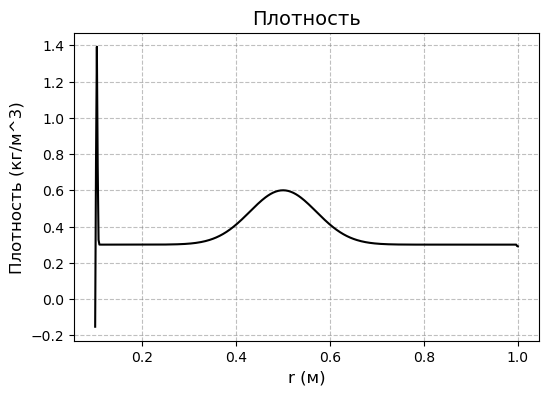

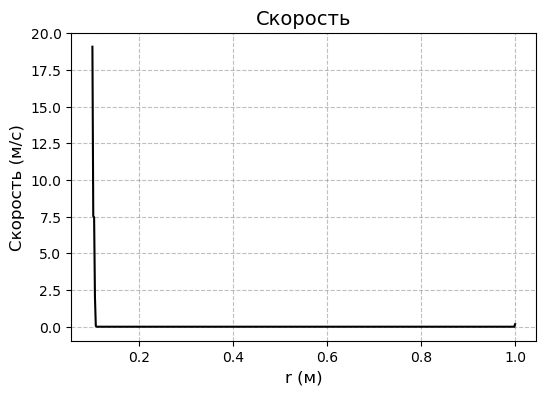

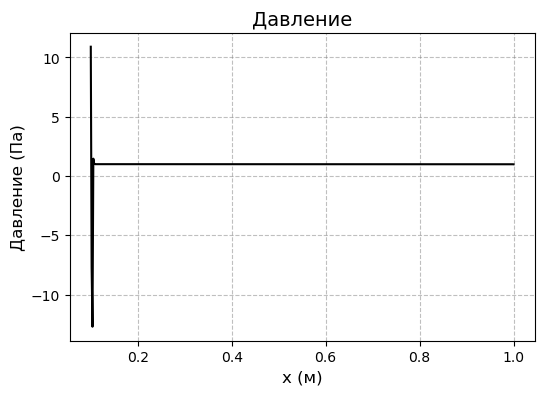

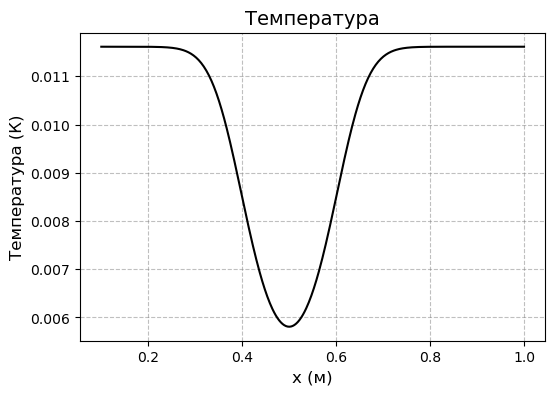

In [43]:
def Initial_Conditional(r_bound, r : list):
    rho = 0.3*np.ones(n_points) + 0.3*np.exp(-(r-0.5)**2/0.1**2)
    u = np.zeros(n_points)
    p = np.ones(n_points)
    T = np.ones(n_points)
    
    #rho[r >= r_bound] = 0.125
    #u[r >= r_bound] = 0.0
    #p[r >= r_bound] = 0.1
    T = p/rho/287
    
    return rho, u, p, T

def calculate_fluxes(rho, u, p, gamma, r): #Добавляем r в аргументы
    F_rho  = rho * u
    F_rhou = rho * u**2 + p
    F_rhoE    = (0.5*rho*u**2 + p/(gamma - 1))*u*rho
    return F_rho, F_rhou, F_rhoE

# --------------------- Функция обновления переменных (RK4) ---------------------
def rk4_step(rho, u, p, r, dr, dt, gamma): # Добавляем r в аргументы
    E = p / (gamma - 1) + 0.5 * rho * u**2
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho, u, p, gamma, r) #Добавляем r

    # Сферическая геометрия:  (1/r^2) * d/dr (r^2 * flux)
    # Мы используем центральные разности для d/dr и используем средние значения r^2

    # Функция для расчета r^2 * flux в узлах сетки
    def r_squared_flux(r, flux):
        return r**2 * flux

    # k1
    r2F_rho = r_squared_flux(r, F_rho)
    r2F_rhou = r_squared_flux(r, F_rhou)
    r2F_rhoE = r_squared_flux(r, F_rhoE)

    #Вычисляем производную используя центральную разность
    drho_dt1  = - (np.roll(r2F_rho, -1) - np.roll(r2F_rho, 1)) / (2 * dr) / r**2 #Добавляем /r**2
    drhou_dt1 = - (np.roll(r2F_rhou, -1) - np.roll(r2F_rhou, 1)) / (2 * dr) / r**2 + 2*p/r  #Добавляем /r**2  + 2p/r
    dE_dt1    = - (np.roll(r2F_rhoE, -1) - np.roll(r2F_rhoE, 1)) / (2 * dr) / r**2 #Добавляем /r**2

    k1_rho  = dt * drho_dt1
    k1_rhou = dt * drhou_dt1
    k1_E    = dt * dE_dt1

    # k2
    rho_temp = rho + k1_rho / 2
    u_temp   = u + k1_rhou / (2*rho) / 2
    E_temp = E + k1_E / 2
    p_temp = (gamma - 1)*(E_temp - 0.5*rho_temp*u_temp**2)
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho_temp, u_temp, p_temp, gamma, r) #Добавляем r

    r2F_rho = r_squared_flux(r, F_rho)
    r2F_rhou = r_squared_flux(r, F_rhou)
    r2F_rhoE = r_squared_flux(r, F_rhoE)

    drho_dt2  = - (np.roll(r2F_rho, -1) - np.roll(r2F_rho, 1)) / (2 * dr) / r**2  #Добавляем /r**2
    drhou_dt2 = - (np.roll(r2F_rhou, -1) - np.roll(r2F_rhou, 1)) / (2 * dr) / r**2  + 2*p_temp/r#Добавляем /r**2  + 2p/r
    dE_dt2    = - (np.roll(r2F_rhoE, -1) - np.roll(r2F_rhoE, 1)) / (2 * dr) / r**2#Добавляем /r**2

    k2_rho  = dt * drho_dt2
    k2_rhou = dt * drhou_dt2
    k2_E    = dt * dE_dt2

    # k3
    rho_temp = rho + k2_rho / 2
    u_temp   = u + k2_rhou / (2*rho) / 2
    E_temp = E + k2_E / 2
    p_temp = (gamma - 1)*(E_temp - 0.5*rho_temp*u_temp**2)
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho_temp, u_temp, p_temp, gamma, r)#Добавляем r

    r2F_rho = r_squared_flux(r, F_rho)
    r2F_rhou = r_squared_flux(r, F_rhou)
    r2F_rhoE = r_squared_flux(r, F_rhoE)

    drho_dt3  = - (np.roll(r2F_rho, -1) - np.roll(r2F_rho, 1)) / (2 * dr) / r**2 #Добавляем /r**2
    drhou_dt3 = - (np.roll(r2F_rhou, -1) - np.roll(r2F_rhou, 1)) / (2 * dr) / r**2  + 2*p_temp/r#Добавляем /r**2  + 2p/r
    dE_dt3    = - (np.roll(r2F_rhoE, -1) - np.roll(r2F_rhoE, 1)) / (2 * dr) / r**2#Добавляем /r**2

    k3_rho  = dt * drho_dt3
    k3_rhou = dt * drhou_dt3
    k3_E    = dt * dE_dt3

    # k4
    rho_temp = rho + k3_rho
    u_temp   = u + k3_rhou / (2*rho)
    E_temp = E + k3_E
    p_temp = (gamma - 1)*(E_temp - 0.5*rho_temp*u_temp**2)
    F_rho, F_rhou, F_rhoE = calculate_fluxes(rho_temp, u_temp, p_temp, gamma,r)#Добавляем r

    r2F_rho = r_squared_flux(r, F_rho)
    r2F_rhou = r_squared_flux(r, F_rhou)
    r2F_rhoE = r_squared_flux(r, F_rhoE)

    drho_dt4  = - (np.roll(r2F_rho, -1) - np.roll(r2F_rho, 1)) / (2 * dr) / r**2#Добавляем /r**2
    drhou_dt4 = - (np.roll(r2F_rhou, -1) - np.roll(r2F_rhou, 1)) / (2 * dr) / r**2 + 2*p_temp/r #Добавляем /r**2  + 2p/r
    dE_dt4    = - (np.roll(r2F_rhoE, -1) - np.roll(r2F_rhoE, 1)) / (2 * dr) / r**2#Добавляем /r**2

    k4_rho  = dt * drho_dt4
    k4_rhou = dt * drhou_dt4
    k4_E    = dt * dE_dt4

    # Обновление переменных
    rho = rho + (k1_rho + 2*k2_rho + 2*k3_rho + k4_rho) / 6
    u   = u   + (k1_rhou + 2*k2_rhou + 2*k3_rhou + k4_rhou) / 6
    E   = E   + (k1_E + 2*k2_E + 2*k3_E + k4_E) / 6
    p = (gamma - 1)*(E - 0.5*rho*u**2)

    return rho, u, p

# ----------- Инициализация сетки и переменных (сферическая геометрия) -----------
n_points = 500 # Number of grid points
r_min = 0.1    # Minimum radius (avoiding r=0 exactly)
r_max = 1.0    # Maximum radius
r = np.linspace(r_min, r_max, n_points)  # Радиальная координата
dr = r[1] - r[0]  # Шаг по радиусу

# -----------  Инициализация переменных (пример) -----------


gamma = 1.4                  # Показатель адиабаты

#r, rho, u, p, T = r, rho_prime, u_prime, p_prime, T_prime
rho, u, p, T = Initial_Conditional(r[2], r)
#print("#0:", rho, u, p, T)
r, rho, u, p, T = Conversion_in_Dim_quantities(r, rho, u, p, T)
#print("#1:", rho, u, p, T)
r, rho, u, p, T = Conversion_in_Dim_less_quantities(r, rho, u, p, T)
#print("#2:", rho, u, p, T)
# ----------- Временные параметры -----------
t      = 0.0
t_end_dim  = 0.001 #  В секундах
cfl    = 0.4     # CFL number (adjust as needed)
dt_dim     = 1.0e-5  # Initial time step (adjust as needed)
#t_end_prime, dt_prime = ConversionTime_in_Dim_less(t_end_dim), ConversionTime_in_Dim_less(dt_dim)
#print(t_end_prime, dt_prime)
t_end, dt = t_end_dim, dt_dim#ConversionTime_in_Dim_less(t_end_dim), ConversionTime_in_Dim_less(dt_dim)

#  ----------- Основной цикл времени -----------
while t < t_end:
    # Ограничение шага по времени (теперь с размерной скоростью звука)
    a = np.sqrt(gamma * p / rho)  # скорость звука
    dt = min(dt, cfl * dr / np.max(np.abs(u) + a))  # Шаг по времени
    print(max(a/U0))
    
    rho, u, p = rk4_step(rho, u, p, r, dr, dt, gamma)  # Передаем r и dr
    t += dt
    print(f"Time: {ConversionTime_in_Dim(t):.6f}")


#print(rho)
# Общие настройки для графиков
fig_size = (6, 4) 
line_color = 'black'
grid_linestyle = '--'
grid_alpha = 0.5
grid_color = 'gray'

def create_plot(x_data, y_data, x_label, y_label, title):
    plt.figure(figsize=fig_size) 
    plt.plot(x_data, y_data, color=line_color)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, linestyle=grid_linestyle, alpha=grid_alpha, color=grid_color)
    # plt.ylim(0,2) # Пример: установить предел по оси Y от 0 до 2
    plt.show()
    plt.close()

r = np.linspace(r_min, r_max, n_points)

# Density plot
create_plot(r, rho, 'r (м)', 'Плотность (кг/м^3)', 'Плотность')
#del x, rho

# Velocity plot
create_plot(r, u, 'r (м)', 'Скорость (м/с)', 'Скорость')
#del x, u

# Pressure plot
#x = np.linspace(xmin, xmax, nx)
create_plot(r, p, 'x (м)', 'Давление (Па)', 'Давление')
#del x, p
# Temperature plot
#x = np.linspace(xmin, xmax, nx)
create_plot(r, T, 'x (м)', 'Температура (К)', 'Температура')
#del x, T

##### Некоторые тесты сферически симметричного случая

1) Начальное условие: возмущение в плотности, должна быть скорость звука
ρ(r, 0) = ρ₀ + A * exp(-(r - r₀)² / σ²) (ρ₀ - средняя плотность, A - амплитуда возмущения, r₀ - положение центра возмущения, σ - ширина возмущения)
u(r, 0) = 0
p(r, 0) = p₀ (постоянное давление)